In [1]:
import pandas as pd, matplotlib.pyplot as plt

In [2]:
file1 = "Stats19-Data1979-2004/Accidents7904.csv"

accidents = pd.read_csv(file1,
sep=',',
header=0,
index_col=False,
parse_dates=['Date'],
dayfirst=True,
tupleize_cols=False,
error_bad_lines=True,
warn_bad_lines=True,skip_blank_lines=True,
nrows=1000000)

/home/elshad/Documents/BI/.py3/lib/python3.6/site-packages/pandas/io/parsers.py:782: FutureWarning: The 'tupleize_cols' argument has been deprecated and will be removed in a future version. Column tuples will then always be converted to MultiIndex.


  self.options, self.engine = self._clean_options(options, engine)


# Qəzaların zaman aralığında sayının araşdırılması

### Bu üsul digər sahələrdə trendin araşdırılması üçün istifadə edilə bilər

In [10]:
# itkilərin sayını tapırıq
casualty_count = accidents.groupby('Date').agg({'Number_of_Casualties': 'sum'})
casualty_count.head()

,Number_of_Casualties
Date,
1979-01-01,510
1979-01-02,479
1979-01-03,477
1979-01-04,428
1979-01-05,588


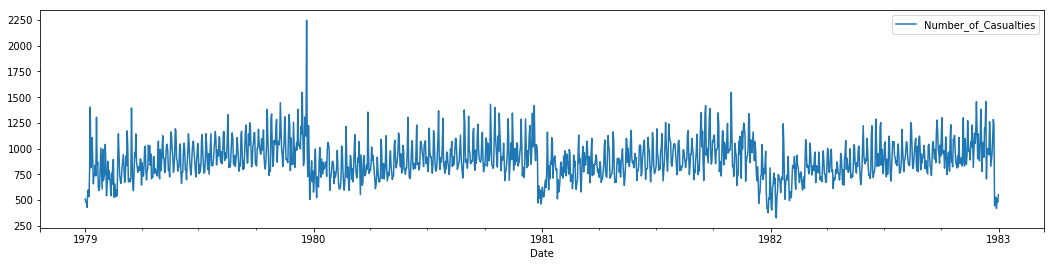

In [12]:
# yeni DataFrame-in indeksini datetime tipinə çevirərək sıralayırıq
casualty_count.index = pd.to_datetime(casualty_count.index)
casualty_count.sort_index(ascending=True, inplace=True)
casualty_count.plot(figsize=(18, 4))

,Number_of_Casualties
Date,
1980,326732
1981,324840
1982,320650


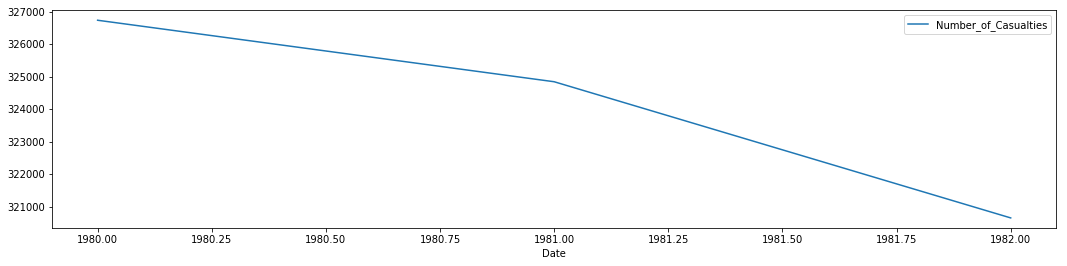

In [23]:
# 80-ci illər üzrə itkilərin artım qrafiki
seksenler = casualty_count['1980-01-01':'1989-12-31']
seksenler = seksenler.groupby(seksenler.index.year).sum()
seksenler.plot(figsize=(18, 4))
seksenler